## <a id="3"></a>

### In this notebook, we are going to make a simple email filtering system. During the course of this notebook, we will use some common NLP techniques.

### <center>Give me some confidence by upvoting this notebook!🙂<center>

## Apparatus Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

## Importing Data

In [2]:
df = pd.read_csv('../input/sms-spam-collection-dataset/spam.csv', encoding='latin-1')

## Basic Data Analysis

In [3]:
print(df.shape)

(5572, 5)


In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Columns Meaning

* v1 is our label column. Which represent wether the email is spam or not spam.
* v2 column contains the text of the emails.
* Other columns are not important.

### Dropping the unnecessary columns.

In [5]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

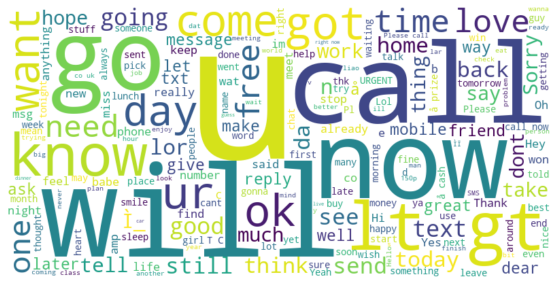

In [6]:
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(''.join(df.v2))

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<AxesSubplot:xlabel='v1', ylabel='count'>

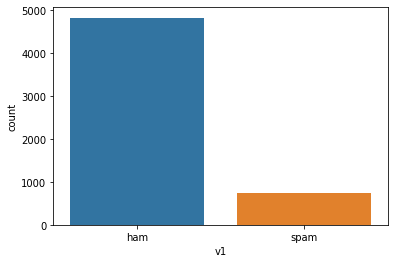

In [7]:
sns.countplot(x = df["v1"], data = df)

In [8]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [9]:
# It seems that the given dataset is imbalanced.

4825 // 747

6

### Transform the values of the output variable into 0 and 1.

In [10]:
df['v1'] = df["v1"].map({'spam':1,'ham':0})

### Let us balance the dataset first.

In [11]:
from sklearn.utils import resample

# create two different dataframe of majority and minority class 

df_majority = df[(df['v1'] == 0)] 

df_minority = df[(df['v1'] == 1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 
replace = True,    # sample with replacement  
                                 
 n_samples = 4825, # to match majority class     
                                 
 random_state = 42) 

# reproducible results
    
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

### The given dataset doesn't contain any missing values as shown below.

In [12]:
df_upsampled.isnull().sum()

v1    0
v2    0
dtype: int64

### Converting text data into vectors.

Machine learning models don't understand textual data. So we have to convert it into numerical form. There are many methods for doing this. For instance, Bag of words, TF-IDF, One-Hot encoding, Word Embedding, etc. We will use a bag of words because it is very intuitive.

## Bag of words:

 In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier.
 
 ## Example Below

In [13]:
# Let's try to convert these text into vectors using bag of words

text = ['Hello my name is james', 'james this is my python notebook', 'james trying to create a big dataset', 'james of words to try differnt', 'features of count vectorizer']

vectorizer = CountVectorizer(stop_words='english')

count_matrix = vectorizer.fit_transform(text)

count_array = count_matrix.toarray()

df1 = pd.DataFrame(data = count_array,columns = vectorizer.get_feature_names())

df1

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,big,count,create,dataset,differnt,features,hello,james,notebook,python,try,trying,vectorizer,words
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,1,0,0,0,0
2,1,0,1,1,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,1,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,0,0,0,0,0,1,0


### Converting email texts into vectors.

In [14]:
# Remove the stop words and transform the texts into the vectorized input variables X

X = vectorizer.fit_transform(df["v2"])

y = df["v1"]

# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.3, random_state=0)

## Training the model

In [15]:
clf = GaussianNB()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8833732057416268

The accuracy of the model is pretty good. It is almsot 89% 🔥.

### <center>Please upvote the notebook if you found it usefull.<center>